<a href="https://colab.research.google.com/github/Aditya11620/majorpro/blob/main/phishing_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

data = pd.read_csv("drive/My Drive/mp/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
#To drop unecessary columns
data = data.drop(['Index'],axis = 1)

In [5]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [6]:
#To display all the columns name
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
#To display the datatypes of all the columns.
data.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [8]:
#To display the size of the dataset along with the column size. 
data.shape

(11054, 31)

In [9]:
#To display the whole dataset
data

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


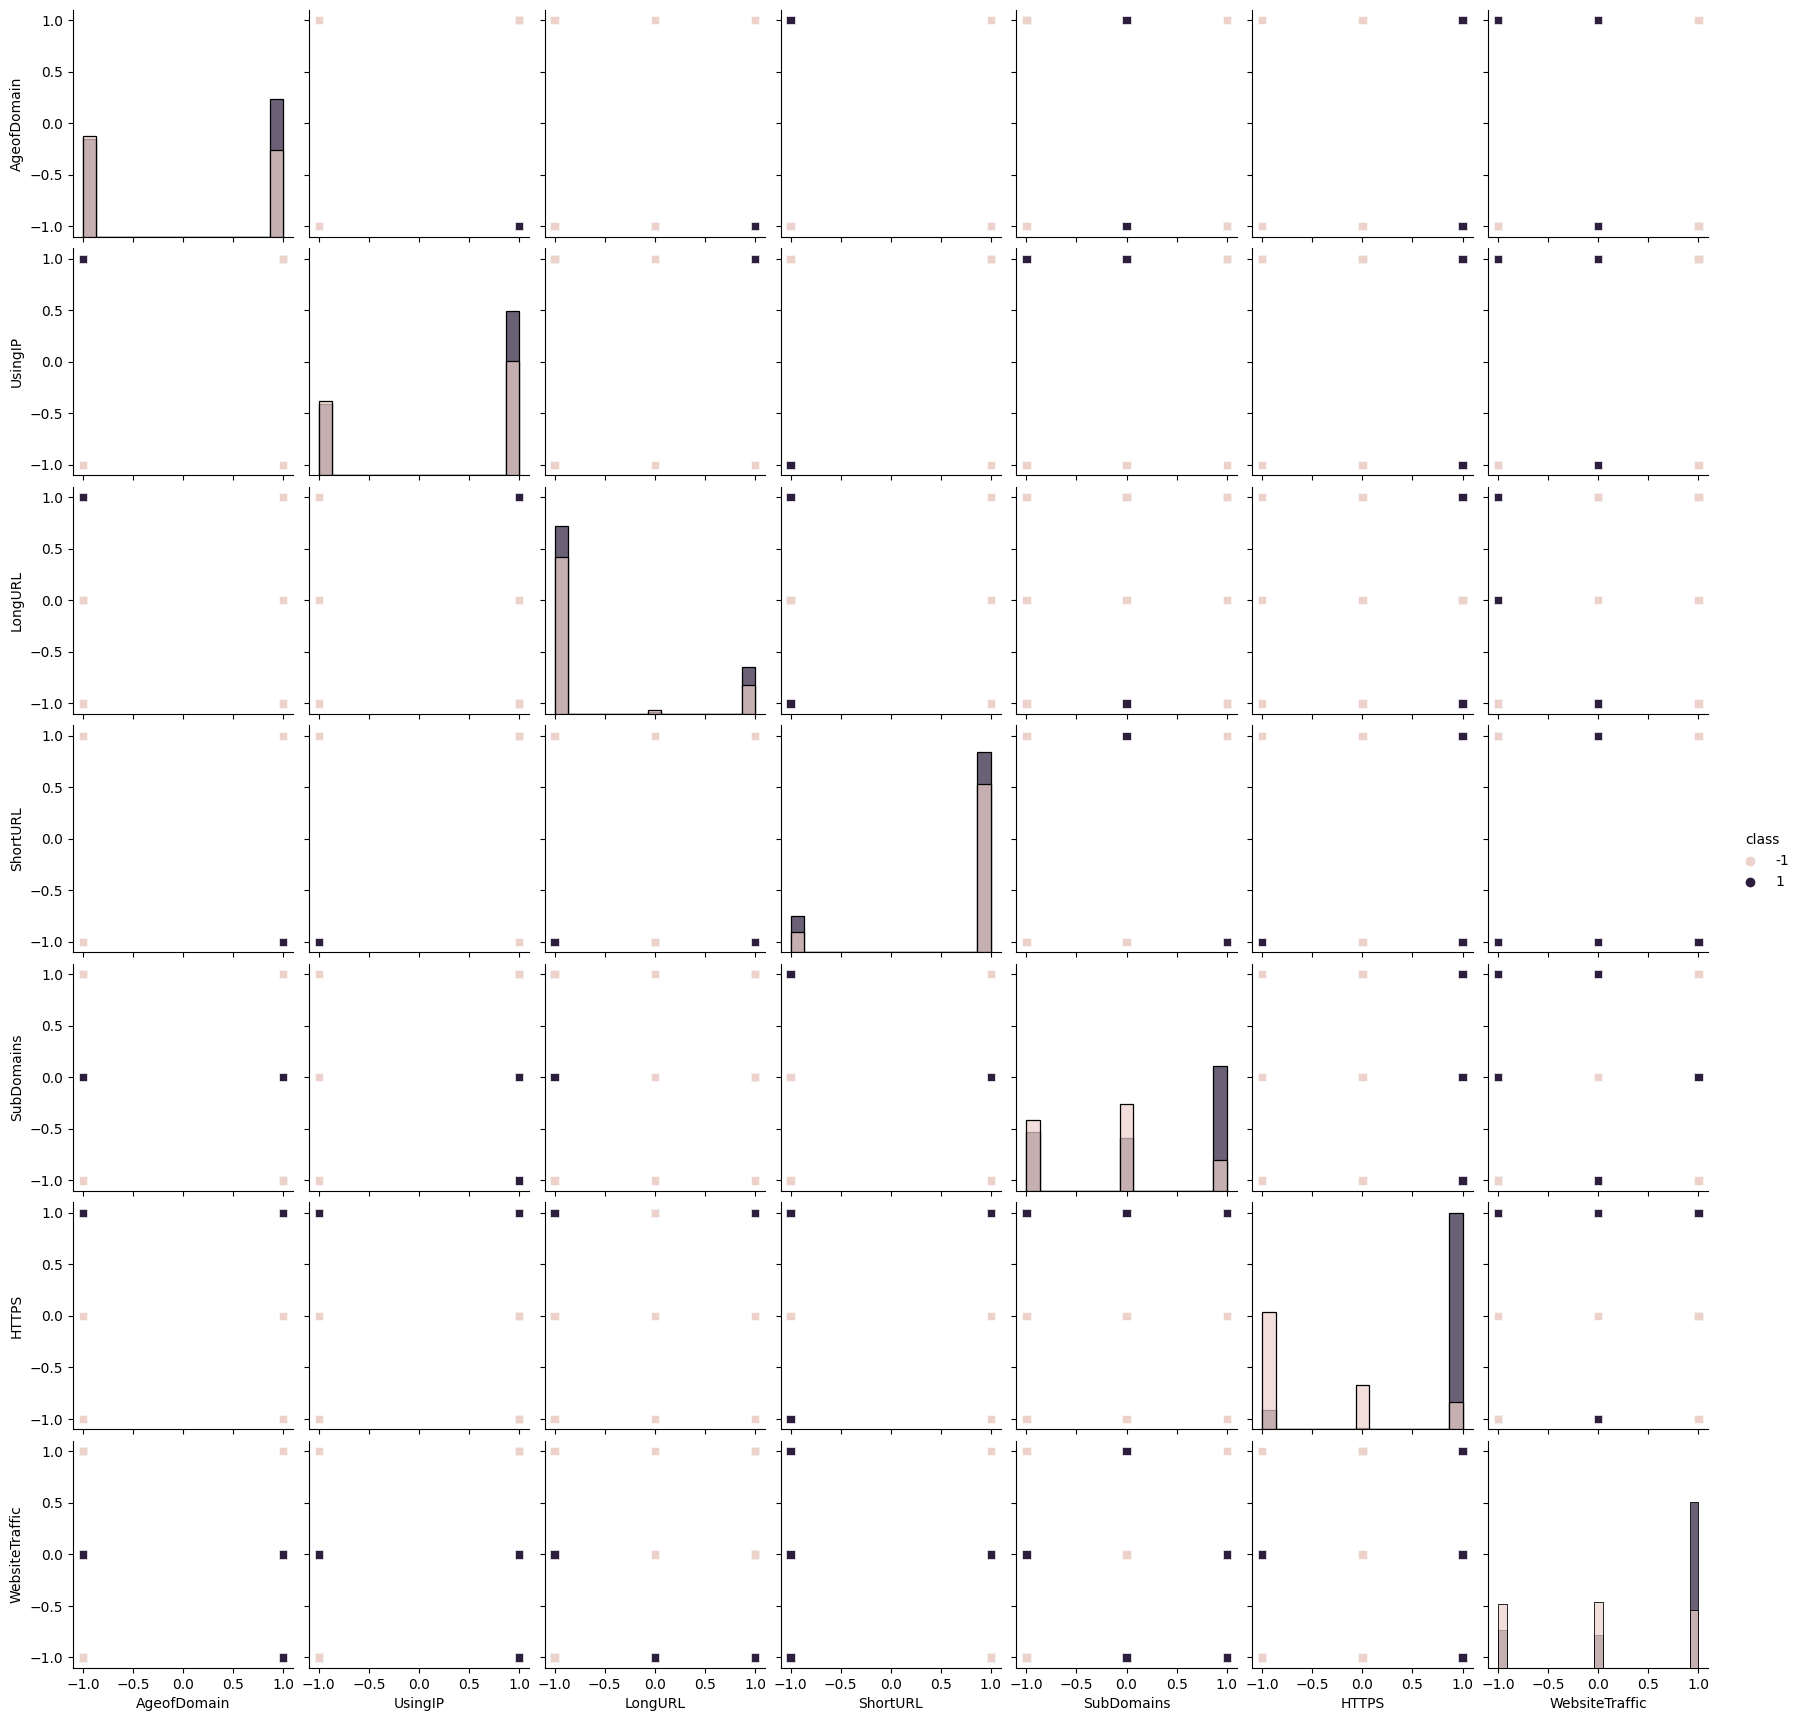

In [10]:
#Creating a pairplot of the specific features.
features = ['AgeofDomain', 'UsingIP','LongURL','ShortURL','SubDomains', 'HTTPS', 'WebsiteTraffic', 'class']
data_subset = data[features]

sns.pairplot(data_subset, hue='class', diag_kind='hist', diag_kws={'alpha': 0.7}, markers='s')
plt.show()


In [11]:
columns_of_interest = [ 'LongURL', 'ShortURL','AnchorURL','AbnormalURL']
data_subset = data[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = data_subset.corr()

# correlation matrix
print(correlation_matrix)

              LongURL  ShortURL  AnchorURL  AbnormalURL
LongURL      1.000000 -0.097976  -0.023153    -0.106347
ShortURL    -0.097976  1.000000   0.000607     0.739573
AnchorURL   -0.023153  0.000607   1.000000    -0.010870
AbnormalURL -0.106347  0.739573  -0.010870     1.000000


Text(0.5, 1.0, 'Phishing Count')

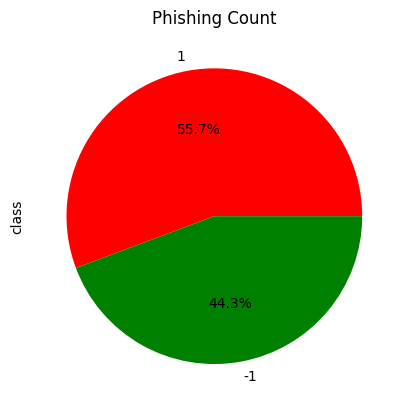

In [12]:

data['class'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['red','green'])
plt.title("Phishing Count")

In [13]:
class_counts = data['class'].value_counts()

# Check which value (-1 or 1) represents phishing websites
phishing_value = class_counts.idxmax()

# Check which value (-1 or 1) represents legitimate websites
legitimate_value = class_counts.idxmin()

print("Value for phishing websites: ", phishing_value)
print("Value for legitimate websites: ", legitimate_value)

Value for phishing websites:  1
Value for legitimate websites:  -1


In [14]:
y = data['class'].values

In [15]:
print(y)

[-1 -1 -1 ... -1 -1 -1]


In [16]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [17]:
# Splitting the data into training and testing data:(70,30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7737, 30), (7737,), (3317, 30), (3317,))

In [18]:
#initialize the variables.
ML_Model = []
accuracy = []
f1_score_new = []
recall = []
precision = []

#creating functions to store the results.
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score_new.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))


 

In [19]:
# Logistic regression model 

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fitting the model 
log.fit(X_train,y_train)

LogisticRegression()

In [21]:
#predicting the value,

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [22]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("LR : Training Accuracy : {:.3f}".format(acc_train_log))
print("LR : Testing Accuracy : {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("LR : Training F1score : {:.3f}".format(f1_score_train_log))
print("LR : Testing F1score : {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("LR : Training Recall : {:.3f}".format(recall_score_train_log))
print("LR : Testing Recall  : {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("LR : Training Precision : {:.3f}".format(precision_score_train_log))
print("LR : Testing Precision : {:.3f}".format(precision_score_test_log))

LR : Training Accuracy : 0.929
LR : Testing Accuracy : 0.927

LR : Training F1score : 0.936
LR : Testing F1score : 0.936

LR : Training Recall : 0.944
LR : Testing Recall  : 0.949

LR : Training Precision : 0.929
LR : Testing Precision : 0.924


In [23]:
# store the results.
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

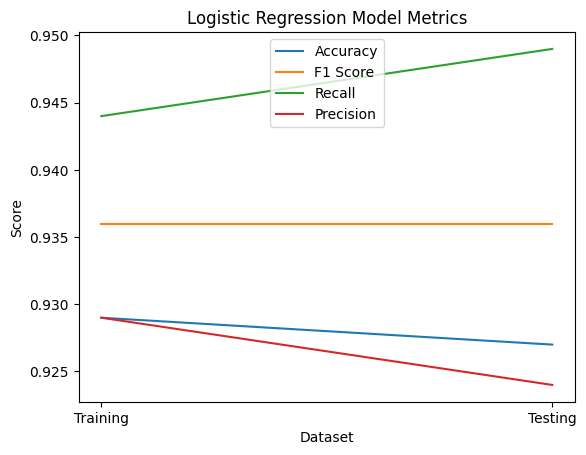

In [24]:
import matplotlib.pyplot as plt

# Accuracy values
acc_train_log = 0.929
acc_test_log = 0.927

# F1 score values
f1_score_train_log = 0.936
f1_score_test_log = 0.936

# Recall values
recall_score_train_log = 0.944
recall_score_test_log = 0.949

# Precision values
precision_score_train_log = 0.929
precision_score_test_log = 0.924

# Create lists of labels and values for each metric
labels = ['Training', 'Testing']
accuracy_values = [acc_train_log, acc_test_log]
f1_score_values = [f1_score_train_log, f1_score_test_log]
recall_values = [recall_score_train_log, recall_score_test_log]
precision_values = [precision_score_train_log, precision_score_test_log]

# Plot accuracy values
plt.plot(labels, accuracy_values, label='Accuracy')

# Plot F1 score values
plt.plot(labels, f1_score_values, label='F1 Score')

# Plot recall values
plt.plot(labels, recall_values, label='Recall')

# Plot precision values
plt.plot(labels, precision_values, label='Precision')

# Add labels and legend
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.title('Logistic Regression Model Metrics')
plt.legend()

# Show the plot
plt.show()


In [25]:
#Support Vector Machine Algorithm

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)


In [28]:
# train the model on the training data
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [29]:
#predicting the value,

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [30]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("SVM : Training Accuracy: {:.3f}".format(acc_train_svc))
print("SVM : Testing Accuracy: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("SVM : Training F1score : {:.3f}".format(f1_score_train_svc))
print("SVM : Testing F1score: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("SVM : Training Recall : {:.3f}".format(recall_score_train_svc))
print("SVM : Testing Recall : {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("SVM : Training Precision : {:.3f}".format(precision_score_train_svc))
print("SVM : Testing Precision: {:.3f}".format(precision_score_test_svc))

SVM : Training Accuracy: 0.968
SVM : Testing Accuracy: 0.958

SVM : Training F1score : 0.972
SVM : Testing F1score: 0.963

SVM : Training Recall : 0.977
SVM : Testing Recall : 0.973

SVM : Training Precision : 0.966
SVM : Testing Precision: 0.954


In [31]:
# storing the results.
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

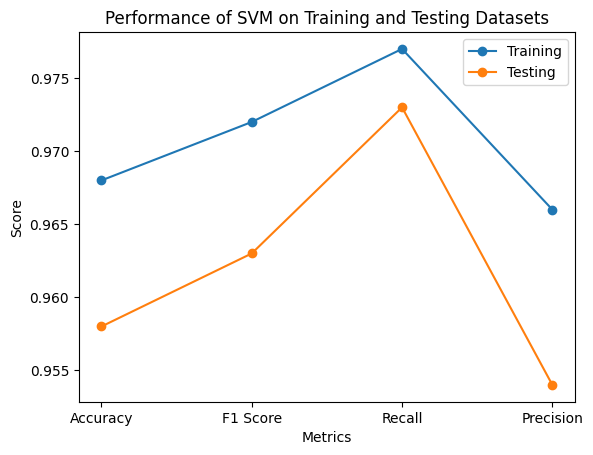

In [32]:
import matplotlib.pyplot as plt

# define the x-axis labels
labels = ['Accuracy', 'F1 Score', 'Recall', 'Precision']

# define the training and testing data
training_data = [0.968, 0.972, 0.977, 0.966]
testing_data = [0.958, 0.963, 0.973, 0.954]

# create the figure and axis
fig, ax = plt.subplots()

# plot the training and testing data as lines
ax.plot(labels, training_data, label='Training', marker='o')
ax.plot(labels, testing_data, label='Testing', marker='o')

# add a title and axis labels
ax.set_title('Performance of SVM on Training and Testing Datasets')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')

# add a legend
ax.legend()

# display the plot
plt.show()


In [33]:
#Random Forest algorithm

In [34]:
from sklearn.ensemble import RandomForestClassifier



In [35]:
forest = RandomForestClassifier(n_estimators=50)

forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [36]:
#predicting the value,

y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [37]:
# Compute the accuracy on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_forest)
test_accuracy = accuracy_score(y_test, y_test_forest)

# Compute precision, recall, and F1-score on the training set
train_precision = precision_score(y_train, y_train_forest)
train_recall = recall_score(y_train, y_train_forest)
train_f1 = f1_score(y_train, y_train_forest)

# Compute precision, recall, and F1-score on the testing set
test_precision = precision_score(y_test, y_test_forest)
test_recall = recall_score(y_test, y_test_forest)
test_f1 = f1_score(y_test, y_test_forest)

# Print the results with 3 decimal places
print("RF : Training accuracy: {:.3f}".format(train_accuracy))
print("RF : Training precision: {:.3f}".format(train_precision))
print("RF : Training recall: {:.3f}".format(train_recall))
print("RF : Training F1-score: {:.3f}".format(train_f1))
print("RF : Testing accuracy: {:.3f}".format(test_accuracy))
print("RF : Testing precision: {:.3f}".format(test_precision))
print("RF : Testing recall: {:.3f}".format(test_recall))
print("RF : Testing F1-score: {:.3f}".format(test_f1))

RF : Training accuracy: 0.992
RF : Training precision: 0.991
RF : Training recall: 0.994
RF : Training F1-score: 0.993
RF : Testing accuracy: 0.968
RF : Testing precision: 0.966
RF : Testing recall: 0.977
RF : Testing F1-score: 0.972


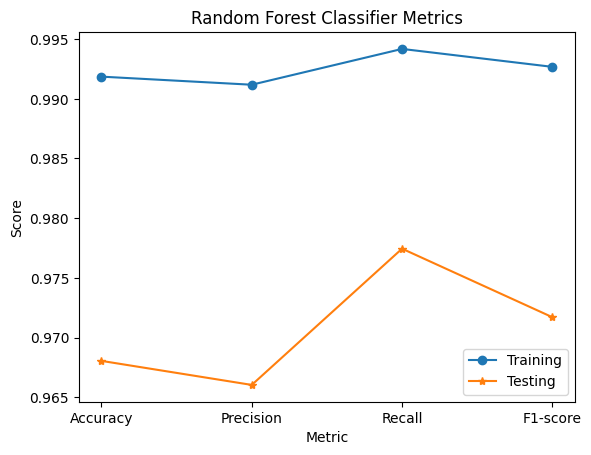

In [38]:
import matplotlib.pyplot as plt

# Define the labels and values for the accuracy, precision, recall, and F1-score
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]

# Set the x-axis range and tick labels
x_range = range(len(labels))
plt.xticks(x_range, labels)

# Plot the results for the training and testing sets with markers
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='*', label='Testing')

# Set the plot title, legend, and axis labels
plt.title('Random Forest Classifier Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


In [39]:
#storing the results
storeResults('Random Forest',test_accuracy,test_f1,
train_recall,train_precision)

In [40]:
#K nearset neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_train_KNN = KNN.predict(X_train)
y_test_KNN = KNN.predict(X_test)

In [44]:
# Compute the accuracy on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_KNN)
test_accuracy = accuracy_score(y_test, y_test_KNN)

# Compute precision, recall, and F1-score on the training set
train_precision = precision_score(y_train, y_train_KNN)
train_recall = recall_score(y_train, y_train_KNN)
train_f1 = f1_score(y_train, y_train_KNN)

# Compute precision, recall, and F1-score on the testing set
test_precision = precision_score(y_test, y_test_KNN)
test_recall = recall_score(y_test, y_test_KNN)
test_f1 = f1_score(y_test, y_test_KNN)

# Print the results with 3 decimal places
print("KNN : Training accuracy: {:.3f}".format(train_accuracy))
print("KNN : Training precision: {:.3f}".format(train_precision))
print("KNN : Training recall: {:.3f}".format(train_recall))
print("KNN : Training F1-score: {:.3f}".format(train_f1))
print("KNN : Testing accuracy: {:.3f}".format(test_accuracy))
print("KNN : Testing precision: {:.3f}".format(test_precision))
print("KNN : Testing recall: {:.3f}".format(test_recall))
print("KNN : Testing F1-score: {:.3f}".format(test_f1))

KNN : Training accuracy: 0.961
KNN : Training precision: 0.961
KNN : Training recall: 0.970
KNN : Training F1-score: 0.965
KNN : Testing accuracy: 0.942
KNN : Testing precision: 0.942
KNN : Testing recall: 0.955
KNN : Testing F1-score: 0.949


In [45]:
#storing the results
storeResults('KNN',test_accuracy,test_f1,
train_recall,train_precision)

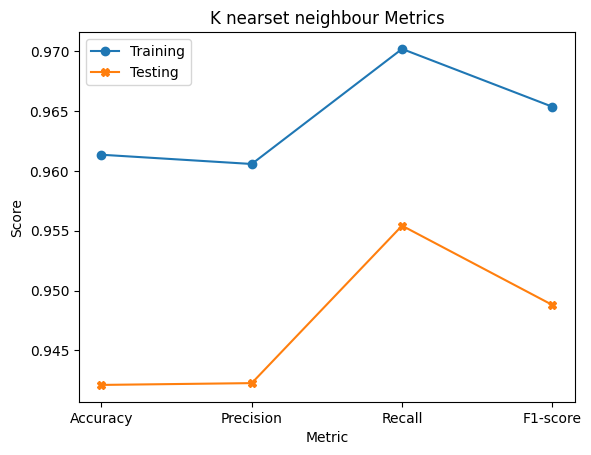

In [46]:
import matplotlib.pyplot as plt

# Define the labels and values for the accuracy, precision, recall, and F1-score
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]

# Set the x-axis range and tick labels
x_range = range(len(labels))
plt.xticks(x_range, labels)

# Plot the results for the training and testing sets with markers
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='X', label='Testing')

# Set the plot title, legend, and axis labels
plt.title('K nearset neighbour Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

In [47]:
# Naive  Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_train_gnb = gnb.predict(X_train)
y_test_gnb = gnb.predict(X_test)

In [50]:
# Compute the accuracy on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_gnb)
test_accuracy = accuracy_score(y_test, y_test_gnb)

# Compute precision, recall, and F1-score on the training set
train_precision = precision_score(y_train, y_train_gnb)
train_recall = recall_score(y_train, y_train_gnb)
train_f1 = f1_score(y_train, y_train_gnb)

# Compute precision, recall, and F1-score on the testing set
test_precision = precision_score(y_test, y_test_gnb)
test_recall = recall_score(y_test, y_test_gnb)
test_f1 = f1_score(y_test, y_test_gnb)
# Print the results with 3 decimal places
print("gnb : Training accuracy: {:.3f}".format(train_accuracy))
print("gnb : Training precision: {:.3f}".format(train_precision))
print("gnb : Training recall: {:.3f}".format(train_recall))
print("gnb : Training F1-score: {:.3f}".format(train_f1))
print("gnb : Testing accuracy: {:.3f}".format(test_accuracy))
print("gnb : Testing precision: {:.3f}".format(test_precision))
print("gnb : Testing recall: {:.3f}".format(test_recall))
print("gnb : Testing F1-score: {:.3f}".format(test_f1))

gnb : Training accuracy: 0.606
gnb : Training precision: 0.996
gnb : Training recall: 0.292
gnb : Training F1-score: 0.451
gnb : Testing accuracy: 0.606
gnb : Testing precision: 0.996
gnb : Testing recall: 0.299
gnb : Testing F1-score: 0.460


In [51]:
#storing the results
storeResults('gnb',test_accuracy,test_f1,
train_recall,train_precision)

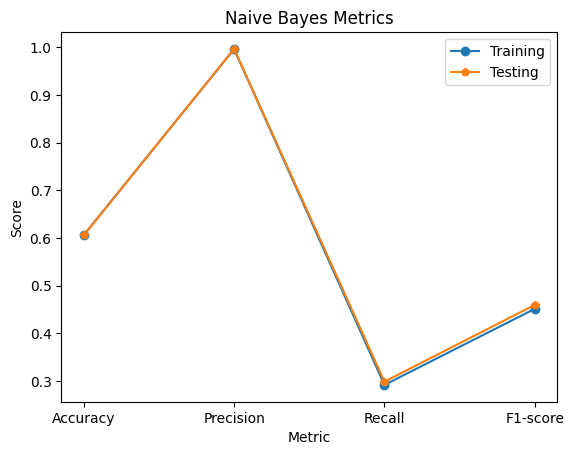

In [52]:
import matplotlib.pyplot as plt

# Define the labels and values for the accuracy, precision, recall, and F1-score
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]

# Set the x-axis range and tick labels
x_range = range(len(labels))
plt.xticks(x_range, labels)

# Plot the results for the training and testing sets with markers
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='p', label='Testing')

# Set the plot title, legend, and axis labels
plt.title('Naive Bayes Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

In [53]:
#eXtreme Gradient Boost algorithm

In [54]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Map class labels to 0 and 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_xgb = model.predict(X_train)

# Make predictions on the testing set
y_test_xgb = model.predict(X_test)

# Calculating the accuracy on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_xgb)
test_accuracy = accuracy_score(y_test, y_test_xgb)

# Calculating precision, recall, and F1-score on the training set
train_precision = precision_score(y_train, y_train_xgb)
train_recall = recall_score(y_train, y_train_xgb)
train_f1 = f1_score(y_train, y_train_xgb)

# Calculating precision, recall, and F1-score on the testing set
test_precision = precision_score(y_test, y_test_xgb)
test_recall = recall_score(y_test, y_test_xgb)
test_f1 = f1_score(y_test, y_test_xgb)

# Print the results with 3 decimal places
print("XGBoost: Training accuracy: {:.3f}".format(train_accuracy))
print("XGBoost: Training precision: {:.3f}".format(train_precision))
print("XGBoost: Training recall: {:.3f}".format(train_recall))
print("XGBoost: Training F1-score: {:.3f}".format(train_f1))
print("XGBoost: Testing accuracy: {:.3f}".format(test_accuracy))
print("XGBoost: Testing precision: {:.3f}".format(test_precision))
print("XGBoost: Testing recall: {:.3f}".format(test_recall))
print("XGBoost: Testing F1-score: {:.3f}".format(test_f1))


XGBoost: Training accuracy: 0.987
XGBoost: Training precision: 0.984
XGBoost: Training recall: 0.993
XGBoost: Training F1-score: 0.988
XGBoost: Testing accuracy: 0.969
XGBoost: Testing precision: 0.964
XGBoost: Testing recall: 0.981
XGBoost: Testing F1-score: 0.973


In [55]:
#storing the results
storeResults('XGBoost',test_accuracy,test_f1,
train_recall,train_precision)

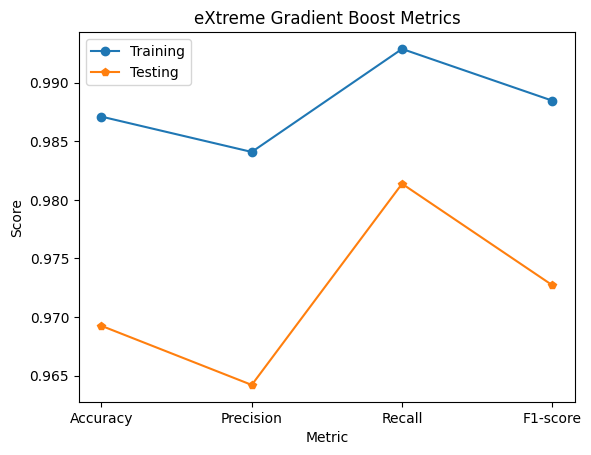

In [56]:
import matplotlib.pyplot as plt

# Define the labels and values for the accuracy, precision, recall, and F1-score
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]

# Set the x-axis range and tick labels
x_range = range(len(labels))
plt.xticks(x_range, labels)

# Plot the results for the training and testing sets with markers
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='p', label='Testing')

# Set the plot title, legend, and axis labels
plt.title('eXtreme Gradient Boost Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


model_1 = RandomForestClassifier()
model_2 = LogisticRegression()
model_3 = SVC()
model_4 = KNeighborsClassifier()
model_5 = GaussianNB()
model_6 = xgb.XGBClassifier()

models = [model_1, model_2, model_3,model_4,model_5,model_6]


# Performing cross-validation and calculating accuracy for each model
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {mean_accuracy}")

# Identify the best model based on accuracy
best_model = models[np.argmax(mean_accuracy)]
print(f"The best model is: {best_model.__class__.__name__}")


Model: RandomForestClassifier
Mean Accuracy: 0.9697825148220233
Model: LogisticRegression
Mean Accuracy: 0.9225618104459195
Model: SVC
Mean Accuracy: 0.9446345401744874
Model: KNeighborsClassifier
Mean Accuracy: 0.937576739912122
Model: GaussianNB
Mean Accuracy: 0.6055710341750729
Model: XGBClassifier
Mean Accuracy: 0.9676114286649844
The best model is: RandomForestClassifier


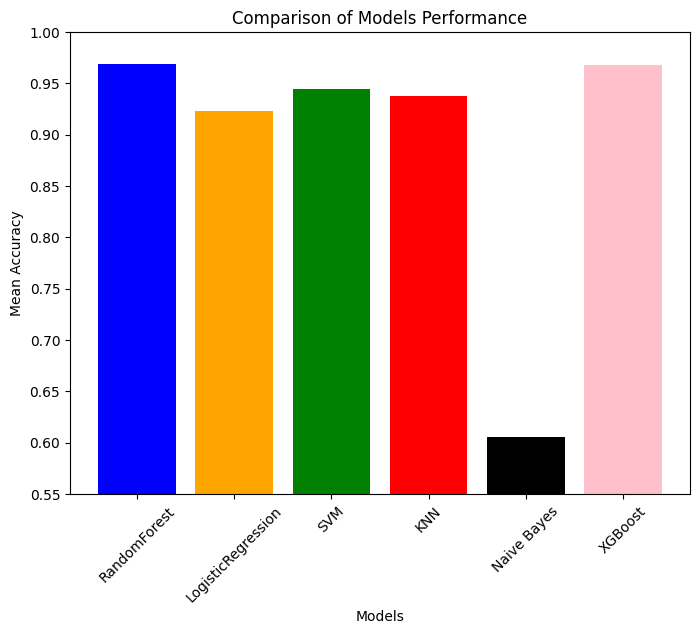

In [58]:
import matplotlib.pyplot as plt

# Mean accuracy scores for each model
mean_accuracies = [0.968244503521062, 0.9225618104459195, 0.9446345401744874, 0.937576739912122,0.6055710341750729,0.9676114286649844]

model_names = ['RandomForest', 'LogisticRegression', 'SVM', 'KNN','Naive Bayes','XGBoost']

colors = ['blue', 'orange', 'green', 'red','black','pink']

plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Models Performance')
plt.ylim([0.55, 1.0]) 
plt.xticks(rotation=45)
plt.show()
